<a href="https://colab.research.google.com/github/BHOSALEMAHADEV/Advanced-Medical-Analyser/blob/main/Advanced_Medical_Analyser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Run this cell in Google Colab
!pip install spacy pandas matplotlib seaborn
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 48.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Sample unstructured medical reports
data = {
    'report': [
        "The patient suffers from diabetes and hypertension. Prescribed metformin and lisinopril.",
        "Complains of chest pain and shortness of breath. Diagnosed with coronary artery disease.",
        "Reports severe headache. MRI shows signs of a tumor. Prescribed paracetamol.",
        "Has fever and cough. Possibly due to a viral infection. Suggested rest and hydration.",
        "The patient was diagnosed with anemia and was given iron supplements.",
        "Experiencing dizziness and fatigue. ECG was performed. Diagnosed with low blood pressure."
    ]
}

df = pd.DataFrame(data)
df.head()


,report
0,The patient suffers from diabetes and hyperten...
1,Complains of chest pain and shortness of breat...
2,Reports severe headache. MRI shows signs of a ...
3,Has fever and cough. Possibly due to a viral i...
4,The patient was diagnosed with anemia and was ...


from matplotlib import pyplot as plt
import seaborn as sns
_df_12.groupby('report').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [3]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra whitespace
    return text

df['cleaned'] = df['report'].apply(clean_text)


In [4]:
def pos_dependency_analysis(text):
    doc = nlp(text)
    return [(token.text, token.pos_, token.dep_) for token in doc]

df['pos_dep'] = df['cleaned'].apply(pos_dependency_analysis)
df[['report', 'pos_dep']].head()


,report,pos_dep
0,The patient suffers from diabetes and hyperten...,"[(the, DET, det), (patient, NOUN, nsubj), (suf..."
1,Complains of chest pain and shortness of breat...,"[(complains, NOUN, ROOT), (of, ADP, prep), (ch..."
2,Reports severe headache. MRI shows signs of a ...,"[(reports, VERB, ROOT), (severe, ADJ, amod), (..."
3,Has fever and cough. Possibly due to a viral i...,"[(has, VERB, ROOT), (fever, NOUN, dobj), (and,..."
4,The patient was diagnosed with anemia and was ...,"[(the, DET, det), (patient, NOUN, nsubjpass), ..."


from matplotlib import pyplot as plt
import seaborn as sns
_df_11.groupby('report').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:
def extract_ner(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

df['spacy_entities'] = df['report'].apply(extract_ner)
df[['report', 'spacy_entities']]


,report,spacy_entities
0,The patient suffers from diabetes and hyperten...,[]
1,Complains of chest pain and shortness of breat...,[]
2,Reports severe headache. MRI shows signs of a ...,[]
3,Has fever and cough. Possibly due to a viral i...,[]
4,The patient was diagnosed with anemia and was ...,[]
5,Experiencing dizziness and fatigue. ECG was pe...,"[(ECG, ORG)]"


from matplotlib import pyplot as plt
import seaborn as sns
_df_10.groupby('report').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
diseases = ['diabetes', 'hypertension', 'coronary artery disease', 'tumor', 'infection', 'anemia', 'low blood pressure']
symptoms = ['chest pain', 'shortness of breath', 'headache', 'fever', 'cough', 'dizziness', 'fatigue']
medications = ['metformin', 'lisinopril', 'paracetamol', 'iron supplements']

def custom_medical_entities(text):
    text = text.lower()
    return {
        'diseases': [d for d in diseases if d in text],
        'symptoms': [s for s in symptoms if s in text],
        'medications': [m for m in medications if m in text]
    }

df['custom_entities'] = df['cleaned'].apply(custom_medical_entities)
df[['report', 'custom_entities']]


,report,custom_entities
0,The patient suffers from diabetes and hyperten...,"{'diseases': ['diabetes', 'hypertension'], 'sy..."
1,Complains of chest pain and shortness of breat...,"{'diseases': ['coronary artery disease'], 'sym..."
2,Reports severe headache. MRI shows signs of a ...,"{'diseases': ['tumor'], 'symptoms': ['headache..."
3,Has fever and cough. Possibly due to a viral i...,"{'diseases': ['infection'], 'symptoms': ['feve..."
4,The patient was diagnosed with anemia and was ...,"{'diseases': ['anemia'], 'symptoms': [], 'medi..."
5,Experiencing dizziness and fatigue. ECG was pe...,"{'diseases': ['low blood pressure'], 'symptoms..."


from matplotlib import pyplot as plt
import seaborn as sns
_df_9.groupby('report').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

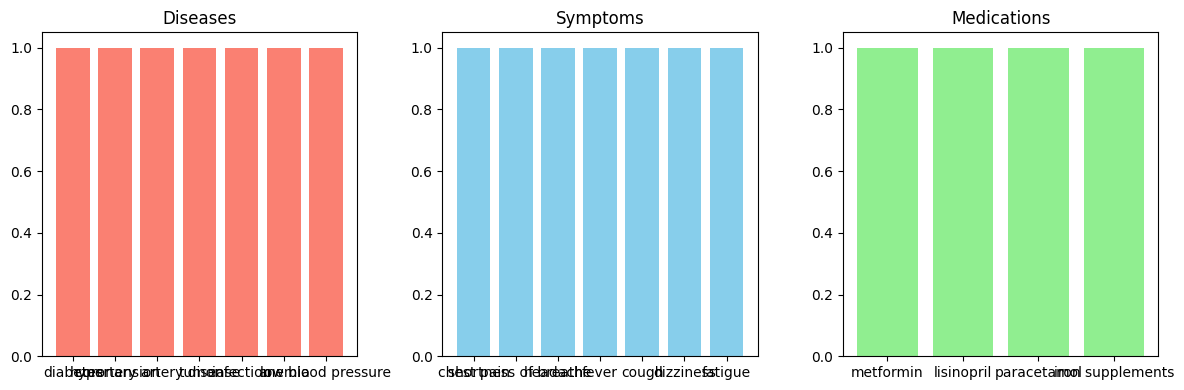

In [7]:
def flatten(list_of_lists):
    return [item for sublist in list_of_lists for item in sublist]

disease_count = Counter(flatten(df['custom_entities'].apply(lambda x: x['diseases'])))
symptom_count = Counter(flatten(df['custom_entities'].apply(lambda x: x['symptoms'])))
meds_count = Counter(flatten(df['custom_entities'].apply(lambda x: x['medications'])))

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.bar(disease_count.keys(), disease_count.values(), color='salmon')
plt.title("Diseases")

plt.subplot(1, 3, 2)
plt.bar(symptom_count.keys(), symptom_count.values(), color='skyblue')
plt.title("Symptoms")

plt.subplot(1, 3, 3)
plt.bar(meds_count.keys(), meds_count.values(), color='lightgreen')
plt.title("Medications")

plt.tight_layout()
plt.show()


In [8]:
# Keywords for basic classification
symptom_keywords = ['pain', 'fever', 'cough', 'headache', 'dizziness', 'fatigue']
diagnosis_keywords = ['diagnosed', 'mri', 'ecg', 'test shows', 'confirmed']

def classify_sentence(text):
    text = text.lower()
    if any(word in text for word in diagnosis_keywords):
        return "Diagnosis"
    elif any(word in text for word in symptom_keywords):
        return "Symptom"
    else:
        return "Other"

df['sentence_type'] = df['report'].apply(classify_sentence)
df[['report', 'sentence_type']]


,report,sentence_type
0,The patient suffers from diabetes and hyperten...,Other
1,Complains of chest pain and shortness of breat...,Diagnosis
2,Reports severe headache. MRI shows signs of a ...,Diagnosis
3,Has fever and cough. Possibly due to a viral i...,Symptom
4,The patient was diagnosed with anemia and was ...,Diagnosis
5,Experiencing dizziness and fatigue. ECG was pe...,Diagnosis


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('report').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('sentence_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('report')):
  _plot_series(series, series_name, i)
  fig.legend(title='report', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('sentence_type')):
  _plot_series(series, series_name, i)
  fig.legend(title='sentence_type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['sentence_type'].value_counts()
    for x_label, grp in _df_6.groupby('report')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('report')
_ = plt.ylabel('sentence_type')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_7['report'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_7, x='index', y='report', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['sentence_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='index', y='sentence_type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [9]:
from spacy import displacy

sample_text = df['report'][1]
doc = nlp(sample_text)

# Visualize entities
displacy.render(doc, style="ent", jupyter=True)

# Visualize dependency tree
displacy.render(doc, style="dep", jupyter=True, options={'distance': 90})


/usr/local/lib/python3.11/dist-packages/spacy/displacy/__init__.py:213: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)
